In [1366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ast

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer, FeatureHasher
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [1367]:
spindtTracks = pd.read_csv("JSON Files/Exported CSV Files/spindtTracks.csv")
artists = pd.read_csv("JSON Files/Exported CSV Files/artists.csv")
songs = pd.read_csv("JSON Files/Exported CSV Files/songs.csv")
songFeatures = pd.read_csv("spotify_audio_features.csv")

In [1368]:
songs = pd.merge(songs, songFeatures, on='id')

In [1369]:
songs

,Unnamed: 0,album,artists,available_markets,duration_ms_x,explicit,external_ids,href,id,name,...,valence,tempo,type,uri_y,track_href,analysis_url,duration_ms_y,time_signature,track_name,artist_name
0,0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",226863,True,{'isrc': 'USEE10414022'},https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),...,0.810,125.461,audio_features,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott
1,1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",198800,False,{'isrc': 'USJI10301005'},https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,6I9VzXrHxO9rA9A5euc8Ak,Toxic,...,0.924,143.040,audio_features,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,198800,4,Toxic,Britney Spears
2,2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CH', 'LI']",235933,False,{'isrc': 'USSM10305425'},https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love (feat. Jay-Z),...,0.701,99.259,audio_features,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,235933,4,Crazy In Love,Beyoncé
3,3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",267266,False,{'isrc': 'USJI10200367'},https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,...,0.817,100.972,audio_features,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,267267,4,Rock Your Body,Justin Timberlake
4,4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],227600,False,{'isrc': 'USMC10000393'},https://api.spotify.com/v1/tracks/1lzr43nnXAij...,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,...,0.654,94.759,audio_features,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4,It Wasn't Me,Shaggy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,34417,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],162185,False,{'isrc': 'USE830996053'},https://api.spotify.com/v1/tracks/1eBk1yNinU0V...,1eBk1yNinU0VgY79rcshYa,I Was Made For Loving You / Please Don't Say Y...,...,0.350,72.944,audio_features,spotify:track:1eBk1yNinU0VgY79rcshYa,https://api.spotify.com/v1/tracks/1eBk1yNinU0V...,https://api.spotify.com/v1/audio-analysis/1eBk...,162186,4,I Was Made For Loving You / Please Don't Say Y...,Kina Grannis
14021,34419,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",191572,False,{'isrc': 'IELWB1500001'},https://api.spotify.com/v1/tracks/006AVH7fq061...,006AVH7fq061voGXkUiII4,Fingertips,...,0.123,115.137,audio_features,spotify:track:006AVH7fq061voGXkUiII4,https://api.spotify.com/v1/tracks/006AVH7fq061...,https://api.spotify.com/v1/audio-analysis/006A...,191573,5,Fingertips,Ryan O'Shaughnessy
14022,34421,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",268760,False,{'isrc': 'GB6S41100002'},https://api.spotify.com/v1/tracks/24ha18yq0t7X...,24ha18yq0t7XnZ9EgJ7HYb,So,...,0.391

In [1370]:
spindtTracks = pd.merge(spindtTracks, songFeatures, on='id')

In [1371]:
spindtTracks = spindtTracks.drop(['Unnamed: 0', 'available_markets', 'track_number', 'type', 'uri', 'track_href', 'duration_ms_y', 'analysis_url', 'track_name'], axis=1)

In [1372]:
artists = artists.drop(['Unnamed: 0', 'href'], axis=1)

In [1373]:
artists['artist_name'] = artists['name']

In [1374]:
artists.drop('name', axis=1, inplace=True)

In [1375]:
songs = songs.drop(['Unnamed: 0', 'type', 'uri_y', 'track_href', 'duration_ms_y', 'track_name', 'analysis_url'], axis=1)

In [1376]:
spindtTracks

,album,artists,duration_ms_x,explicit,id,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,232546,True,2lrRWbiHPdBicufAqrGN3r,Don't Wanna Fight,0,0.606,0.915,10,-3.292,0,0.1660,0.25900,0.107000,0.1050,0.551,100.433,4,Alabama Shakes
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,308066,False,17ZnveSDBpG9QtL7zLJNPy,Only For You,3,0.677,0.649,10,-5.906,1,0.0311,0.04420,0.069500,0.1040,0.787,82.016,4,Heartless Bastards
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,181259,False,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,67,0.839,0.585,2,-7.738,1,0.1530,0.47800,0.002810,0.0435,0.890,89.821,4,Vulfpeck
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,238560,False,0NeJjNlprGfZpeX2LQuN6c,River,0,0.658,0.179,8,-10.866,1,0.0448,0.68900,0.000000,0.1700,0.191,128.128,4,Leon Bridges
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,243160,False,0iTpQYzJnYgh7kIxyq8A2O,Two Weeks,2,0.537,0.712,5,-5.597,1,0.0286,0.28900,0.005680,0.0800,0.704,159.871,4,Grizzly Bear
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,234800,False,0UV5zxRMz6AO4ZwUOZNIKI,Where'd All the Time Go?,81,0.454,0.820,2,-4.193,1,0.0567,0.13200,0.000969,0.1150,0.575,166.303,4,Dr. Dog
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,289093,False,3v6NuKeDbFbaq1lNjw3XtR,Pulaski at Night,58,0.446,0.643,7,-7.925,1,0.0561,0.67000,0.000818,0.0951,0.531,99.608,4,Andrew Bird
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,228055,False,70WY0OFaz7293OjqeUPJnL,Bring My Baby Back,40,0.574,0.800,1,-5.686,0,0.0405,0.03560,0.001570,0.4240,0.421,73.588,4,Dr. Dog
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,187720,False,5jJ69cMDMC0aeWPjZo6VP2,Lampshades on Fire,59,0.659,0.906,7,-3.906,0,0.0428,0.15600,0.000003,0.1050,0.792,94.997,4,Modest Mouse
9,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,224906,False,55C8Zut2Ug8wPNrU4OJYPd,Ride On / Right On,0,0.539,0.581,7,-7.423,1,0.0316,0.00808,0.058900,0.1500,0.237,95.075,4,Phosphorescent


In [1377]:
spindtTracksAnalysis = spindtTracks

In [1378]:
artists['followers']

followersArr = []
for i in artists['followers']:
    followersArr.append(ast.literal_eval(i)['total'])

In [1379]:
artists['followers'] = followersArr

In [1380]:
spindtTracksAnalysis = pd.merge(spindtTracksAnalysis, artists[['artist_name', 'genres', 'followers']], on='artist_name', how='left')
spindtTracksAnalysis = spindtTracksAnalysis.drop(['id', 'artists'], axis=1)

In [1381]:
spindtTracksAnalysis

,album,duration_ms_x,explicit,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers
0,"{'album_type': 'album', 'artists': [{'external...",232546,True,Don't Wanna Fight,0,0.606,0.915,10,-3.292,0,0.1660,0.25900,0.107000,0.1050,0.551,100.433,4,Alabama Shakes,"['alabama indie', 'modern blues rock', 'rock']",1604741
1,"{'album_type': 'album', 'artists': [{'external...",308066,False,Only For You,3,0.677,0.649,10,-5.906,1,0.0311,0.04420,0.069500,0.1040,0.787,82.016,4,Heartless Bastards,['stomp and holler'],179423
2,"{'album_type': 'album', 'artists': [{'external...",181259,False,Back Pocket,67,0.839,0.585,2,-7.738,1,0.1530,0.47800,0.002810,0.0435,0.890,89.821,4,Vulfpeck,"['ann arbor indie', 'funk rock', 'instrumental...",894503
3,"{'album_type': 'album', 'artists': [{'external...",238560,False,River,0,0.658,0.179,8,-10.866,1,0.0448,0.68900,0.000000,0.1700,0.191,128.128,4,Leon Bridges,"['modern blues', 'neo soul', 'soul']",1630986
4,"{'album_type': 'album', 'artists': [{'external...",243160,False,Two Weeks,2,0.537,0.712,5,-5.597,1,0.0286,0.28900,0.005680,0.0800,0.704,159.871,4,Grizzly Bear,"['art pop', 'baroque pop', 'brooklyn indie', '...",836535
5,"{'album_type': 'album', 'artists': [{'external...",234800,False,Where'd All the Time Go?,81,0.454,0.820,2,-4.193,1,0.0567,0.13200,0.000969,0.1150,0.575,166.303,4,Dr. Dog,"['chamber pop', 'indie rock', 'modern folk roc...",518829
6,"{'album_type': 'album', 'artists': [{'external...",289093,False,Pulaski at Night,58,0.446,0.643,7,-7.925,1,0.0561,0.67000,0.000818,0.0951,0.531,99.608,4,Andrew Bird,"['baroque pop', 'chamber pop', 'chicago indie'...",579337
7,"{'album_type': 'album', 'artists': [{'external...",228055,False,Bring My Baby Back,40,0.574,0.800,1,-5.686,0,0.0405,0.03560,0.001570,0.4240,0.421,73.588,4,Dr. Dog,"['chamber pop', 'indie rock', 'modern folk roc...",518829
8,"{'album_type': 'album', 'artists': [{'external...",187720,False,Lampshades on Fire,59,0.659,0.906,7,-3.906,0,0.0428,0.15600,0.000003,0.1050,0.792,94.997,4,Modest Mouse,"['alternative rock', 'chamber pop', 'indie roc...",1427204
9,"{'album_type': 'album', 'artists': [{'external...",224906,False,Ride On / Right On,0,0.539,0.581,7,-7.423,1,0.0316,0.00808,0.058900,0.1500,0.237,95.075,4,Phosphorescent,"['alternative americana', 'chamber pop', 'coun...",227990


In [1382]:
songs

,album,artists,available_markets,duration_ms_x,explicit,external_ids,href,id,name,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",226863,True,{'isrc': 'USEE10414022'},https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),69,...,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4,Missy Elliott
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",198800,False,{'isrc': 'USJI10301005'},https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,6I9VzXrHxO9rA9A5euc8Ak,Toxic,86,...,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4,Britney Spears
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CH', 'LI']",235933,False,{'isrc': 'USSM10305425'},https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love (feat. Jay-Z),20,...,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4,Beyoncé
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",267266,False,{'isrc': 'USJI10200367'},https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,82,...,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,4,Justin Timberlake
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],227600,False,{'isrc': 'USMC10000393'},https://api.spotify.com/v1/tracks/1lzr43nnXAij...,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,9,...,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,4,Shaggy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],162185,False,{'isrc': 'USE830996053'},https://api.spotify.com/v1/tracks/1eBk1yNinU0V...,1eBk1yNinU0VgY79rcshYa,I Was Made For Loving You / Please Don't Say Y...,0,...,-10.681,1,0.0319,0.85900,0.000000,0.1040,0.350,72.944,4,Kina Grannis
14021,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",191572,False,{'isrc': 'IELWB1500001'},https://api.spotify.com/v1/tracks/006AVH7fq061...,006AVH7fq061voGXkUiII4,Fingertips,28,...,-10.627,1,0.0442,0.69700,0.000000,0.1350,0.123,115.137,5,Ryan O'Shaughnessy
14022,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",268760,False,{'isrc': 'GB6S41100002'},https://api.spotify.com/v1/tracks/24ha18yq0t7X...,24ha18yq0t7XnZ9EgJ7HYb,So,42,...,-10.599,1,0.0431,0.85300,0.000000,0.3500,0.391,140.077,4,Ed Sheeran
14023,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],227369,False,{'isrc': 'USE831541493'},https://api.spotify.com/v1/tracks/7du4OH1Ld78P...,7du4OH1Ld78PJhC8fDLUJO,Light Outside,0,...,-17.745,1,0.0462,0.93400,0.000000,0.0870,0.392,180.000,3,Rusty Clanton


In [1383]:
songsAnalysis = songs.drop(['id', 'href', 'external_ids', 'available_markets', 'track_number'], axis=1)

In [1384]:
songsAlbums = songsAnalysis['album']

In [1385]:
songsAlbumsArr = []
for i in songsAlbums:
    songsAlbumsArr.append(ast.literal_eval(i)['name'])

In [1386]:
songsAnalysis['album'] = songsAlbumsArr

In [1387]:
songsAnalysis['album'].value_counts()

Greatest Hits                                                            47
Les Misérables: The Motion Picture Soundtrack Deluxe (Deluxe Edition)    36
Original Album Classics                                                  34
Hamilton (Original Broadway Cast Recording)                              26
RENT (Original Motion Picture Soundtrack)                                25
                                                                         ..
Wicked Games (feat. Anna Naklab)                                          1
Amor (Spanish Edition / Remastered)                                       1
Killing Me Softly                                                         1
I Know You (From The "Fifty Shades Of Grey" Soundtrack)                   1
Yellow Circles EP                                                         1
Name: album, Length: 8108, dtype: int64

In [1388]:
songsAnalysis['artist_name'].value_counts()

Drake                   107
Kendrick Lamar           68
Kanye West               60
John Mayer               60
Eminem                   59
                       ... 
Wolf Gang                 1
Alfredo Olivas            1
Colmillo Norteño          1
Banda Tierra Sagrada      1
Layla                     1
Name: artist_name, Length: 4186, dtype: int64

In [1389]:
songsAnalysis['album'].nunique()

8108

In [1390]:
songsAnalysis = pd.merge(songsAnalysis, artists[['artist_name', 'genres', 'followers']], on='artist_name', how='left')

In [1391]:
songsAnalysis = songsAnalysis.sort_values(by=['popularity'], ascending=False)
songsAnalysis.drop_duplicates(subset=['name'], keep='first', inplace=True)
songsAnalysis = songsAnalysis.drop('artists', axis=1)

In [1392]:
scaler = MinMaxScaler()
numerical_columns = songsAnalysis.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = songsAnalysis.drop('explicit', axis=1).select_dtypes(include=['object']).columns.tolist()
binary_columns = songsAnalysis['explicit']
songsAnalysis[numerical_columns] = scaler.fit_transform(songsAnalysis[numerical_columns])

In [1393]:
songsAnalysis = songsAnalysis.join(pd.get_dummies(songsAnalysis['explicit']))
songsAnalysis.dropna(inplace=True)
songsAnalysis.reset_index(inplace=True)
songsAnalysis.drop(['explicit', 'index', 'uri_x'], axis=1, inplace=True)

In [1394]:
songsAnalysis

,album,duration_ms_x,name,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers,False,True
0,I Love You.,0.244805,Sweater Weather,1.00000,0.619433,0.807150,0.909091,0.931816,1.0,0.035257,...,0.017933,0.101101,0.402020,0.565685,0.8,The Neighbourhood,"['modern alternative rock', 'modern rock', 'pop']",0.137250,1,0
1,Parachutes,0.271662,Yellow,1.00000,0.434211,0.660503,1.000000,0.818254,1.0,0.029486,...,0.000123,0.234234,0.287879,0.790581,0.8,Coldplay,"['permanent wave', 'pop']",0.434773,1,0
2,Blonde,0.187897,Pink + White,0.98913,0.551619,0.543989,0.818182,0.814783,1.0,0.112277,...,0.000056,0.417417,0.554545,0.729331,0.6,Frank Ocean,"['lgbtq+ hip hop', 'neo soul']",0.116047,1,0
3,Long Way Down (Deluxe),0.248838,Another Love,0.98913,0.450405,0.535954,0.363636,0.784702,0.0,0.041973,...,0.000017,0.094494,0.132323,0.559830,0.8,Tom Odell,['chill pop'],0.032803,0,1
4,Flower Boy,0.183692,See You Again (feat. Kali Uchis),0.98913,0.564777,0.558051,0.545455,0.766962,1.0,0.100630,...,0.000008,0.109109,0.626263,0.358227,0.8,"Tyler, The Creator","['hip hop', 'rap']",0.126035,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13552,ANTI,0.228105,Love On The Brain,0.00000,0.515182,0.636397,0.363636,0.879882,0.0,0.049423,...,0.000011,0.078979,0.381818,0.784352,0.6,Rihanna,"['barbadian pop', 'pop', 'urban contemporary']",0.517412,0,1
13553,Ride The Lightning (Deluxe / Remastered),0.315653,For Whom The Bell Tolls - Remastered,0.00000,0.524291,0.858375,0.000000,0.846021,1.0,0.070514,...,0.003536,0.059860,0.251515,0.537613,0.8,Metallica,"['hard rock', 'metal', 'old school thrash', 'r...",0.234295,1,0
13554,Dr. Feel Good,0.295233,Dr. Feelgood,0.00000,0.541498,0.969867,0.181818,0.902610,1.0,0.076705,...,0.010942,0.237237,0.360606,0.506140,0.8,Mötley Crüe,"['album rock', 'alternative metal', 'glam meta...",0.044122,1,0
13555,Often (Kygo Remix),0.238695,Often - Kygo Remix,0.00000,0.589069,0.496781,0.636364,0.749377,0.0,0.047744,...,0.000000,0.385385,0.430303,0.364930,0.8,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",0.707203,0,1


In [1395]:
# Get individual genres sorted by occurrences
genreList = []
for genre in songsAnalysis['genres']:
    genreList.append(genre)

uniqueGenres = []
for i in range(len(genreList)):
    for genre in ast.literal_eval(genreList[i]):
        uniqueGenres.append(genre)

uniqueGenres = pd.DataFrame(uniqueGenres)
genre_counts = uniqueGenres[0].value_counts()
uniqueGenres = pd.DataFrame(genre_counts)
uniqueGenres.reset_index(inplace=True)
uniqueGenres.columns = ['genre', 'count']
uniqueGenres.sort_values(by='count', ascending=False, inplace=True)
uniqueGenres.drop_duplicates(keep='first', inplace=True)
uniqueGenres.reset_index(inplace=True)
uniqueGenres.drop('index', axis=1, inplace=True)

In [1396]:
def find_most_common_genre(genre_list):

    if len(genre_list) == 0:
        return None

    # Iterate through each genre in the list
    most_common_genre = None
    lowest_index = float('inf')  # Initialize with positive infinity
    for genre in ast.literal_eval(genre_list):
        if genre in uniqueGenres['genre'].values:
            index_in_sorted = uniqueGenres.index[uniqueGenres['genre'] == genre].tolist()[0]
            if index_in_sorted < lowest_index:
                lowest_index = index_in_sorted
                most_common_genre = genre
    return most_common_genre

# Apply the function to each row in dataset
songsAnalysis['single_genre'] = songsAnalysis['genres'].apply(find_most_common_genre)

In [1397]:
songsAnalysis

,album,duration_ms_x,name,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,artist_name,genres,followers,False,True,single_genre
0,I Love You.,0.244805,Sweater Weather,1.00000,0.619433,0.807150,0.909091,0.931816,1.0,0.035257,...,0.101101,0.402020,0.565685,0.8,The Neighbourhood,"['modern alternative rock', 'modern rock', 'pop']",0.137250,1,0,pop
1,Parachutes,0.271662,Yellow,1.00000,0.434211,0.660503,1.000000,0.818254,1.0,0.029486,...,0.234234,0.287879,0.790581,0.8,Coldplay,"['permanent wave', 'pop']",0.434773,1,0,pop
2,Blonde,0.187897,Pink + White,0.98913,0.551619,0.543989,0.818182,0.814783,1.0,0.112277,...,0.417417,0.554545,0.729331,0.6,Frank Ocean,"['lgbtq+ hip hop', 'neo soul']",0.116047,1,0,neo soul
3,Long Way Down (Deluxe),0.248838,Another Love,0.98913,0.450405,0.535954,0.363636,0.784702,0.0,0.041973,...,0.094494,0.132323,0.559830,0.8,Tom Odell,['chill pop'],0.032803,0,1,chill pop
4,Flower Boy,0.183692,See You Again (feat. Kali Uchis),0.98913,0.564777,0.558051,0.545455,0.766962,1.0,0.100630,...,0.109109,0.626263,0.358227,0.8,"Tyler, The Creator","['hip hop', 'rap']",0.126035,0,1,rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13552,ANTI,0.228105,Love On The Brain,0.00000,0.515182,0.636397,0.363636,0.879882,0.0,0.049423,...,0.078979,0.381818,0.784352,0.6,Rihanna,"['barbadian pop', 'pop', 'urban contemporary']",0.517412,0,1,pop
13553,Ride The Lightning (Deluxe / Remastered),0.315653,For Whom The Bell Tolls - Remastered,0.00000,0.524291,0.858375,0.000000,0.846021,1.0,0.070514,...,0.059860,0.251515,0.537613,0.8,Metallica,"['hard rock', 'metal', 'old school thrash', 'r...",0.234295,1,0,rock
13554,Dr. Feel Good,0.295233,Dr. Feelgood,0.00000,0.541498,0.969867,0.181818,0.902610,1.0,0.076705,...,0.237237,0.360606,0.506140,0.8,Mötley Crüe,"['album rock', 'alternative metal', 'glam meta...",0.044122,1,0,rock
13555,Often (Kygo Remix),0.238695,Often - Kygo Remix,0.00000,0.589069,0.496781,0.636364,0.749377,0.0,0.047744,...,0.385385,0.430303,0.364930,0.8,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",0.707203,0,1,pop


In [1398]:
songsAnalysisData = songsAnalysis.drop(['name', 'genres'], axis=1)

In [1399]:
songsAnalysisData

,album,duration_ms_x,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,followers,False,True,single_genre
0,I Love You.,0.244805,1.00000,0.619433,0.807150,0.909091,0.931816,1.0,0.035257,0.049697,0.017933,0.101101,0.402020,0.565685,0.8,The Neighbourhood,0.137250,1,0,pop
1,Parachutes,0.271662,1.00000,0.434211,0.660503,1.000000,0.818254,1.0,0.029486,0.002398,0.000123,0.234234,0.287879,0.790581,0.8,Coldplay,0.434773,1,0,pop
2,Blonde,0.187897,0.98913,0.551619,0.543989,0.818182,0.814783,1.0,0.112277,0.669678,0.000056,0.417417,0.554545,0.729331,0.6,Frank Ocean,0.116047,1,0,neo soul
3,Long Way Down (Deluxe),0.248838,0.98913,0.450405,0.535954,0.363636,0.784702,0.0,0.041973,0.697791,0.000017,0.094494,0.132323,0.559830,0.8,Tom Odell,0.032803,0,1,chill pop
4,Flower Boy,0.183692,0.98913,0.564777,0.558051,0.545455,0.766962,1.0,0.100630,0.372489,0.000008,0.109109,0.626263,0.358227,0.8,"Tyler, The Creator",0.126035,0,1,rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13552,ANTI,0.228105,0.00000,0.515182,0.636397,0.363636,0.879882,0.0,0.049423,0.071987,0.000011,0.078979,0.381818,0.784352,0.6,Rihanna,0.517412,0,1,pop
13553,Ride The Lightning (Deluxe / Remastered),0.315653,0.00000,0.524291,0.858375,0.000000,0.846021,1.0,0.070514,0.005651,0.003536,0.059860,0.251515,0.537613,0.8,Metallica,0.234295,1,0,rock
13554,Dr. Feel Good,0.295233,0.00000,0.541498,0.969867,0.181818,0.902610,1.0,0.076705,0.000806,0.010942,0.237237,0.360606,0.506140,0.8,Mötley Crüe,0.044122,1,0,rock
13555,Often (Kygo Remix),0.238695,0.00000,0.589069,0.496781,0.636364,0.749377,0.0,0.047744,0.120481,0.000000,0.385385,0.430303,0.364930,0.8,The Weeknd,0.707203,0,1,pop


In [1400]:
songsAnalysisData['artist_name'].nunique()

4060

In [1401]:
songsAnalysisData['album'].nunique()

7836

In [1402]:
songsAnalysisData['single_genre'].nunique()

535

In [1403]:
# le = LabelEncoder()
# songsAnalysisData['single_genre'] = le.fit_transform(songsAnalysisData['single_genre'])
# songsAnalysisData['album'] = le.fit_transform(songsAnalysisData['album'])
# songsAnalysisData['artist_name'] = le.fit_transform(songsAnalysisData['artist_name'])
songsAnalysisData.drop(['single_genre', 'album', 'artist_name'], axis=1, inplace=True)

In [1404]:
scalerMM = MinMaxScaler()
numerical_columns = songsAnalysisData.select_dtypes(include=['float64', 'int64']).columns.tolist()
songsAnalysisData[numerical_columns] = scalerMM.fit_transform(songsAnalysisData[numerical_columns])

In [1405]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(songsAnalysisData)

In [1406]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
clusters = hierarchical_cluster.fit_predict(songsAnalysisData)

In [1407]:
silhouette_avg = silhouette_score(tsne_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.0009832177311182022


In [1408]:
unique_clusters = np.unique(clusters)
cluster_features = {}

for cluster_label in unique_clusters:
    cluster_mask = (clusters == cluster_label)
    cluster_data = songsAnalysisData[cluster_mask]
    cluster_mean = np.mean(cluster_data, axis=0)  # Compute mean along columns (features)
    cluster_features[cluster_label] = cluster_mean

In [1409]:
cluster_features

{0: duration_ms_x       0.207639
 popularity          0.000000
 danceability        0.695682
 energy              0.329041
 key                 0.666667
 loudness            0.728663
 mode                1.000000
 speechiness         0.037216
 acousticness        0.792503
 instrumentalness    0.000000
 liveness            0.148482
 valence             0.619529
 tempo               0.502541
 time_signature      0.800000
 followers           0.442456
 False               1.000000
 True                0.000000
 dtype: float64,
 1: duration_ms_x       0.208289
 popularity          0.554348
 danceability        0.586538
 energy              0.825731
 key                 0.000000
 loudness            0.871230
 mode                1.000000
 speechiness         0.042550
 acousticness        0.003585
 instrumentalness    0.327761
 liveness            0.118418
 valence             0.224747
 tempo               0.622190
 time_signature      0.800000
 followers           0.444796
 False           

In [1410]:
hierarchical_cluster_tsne = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
clusters2 = hierarchical_cluster_tsne.fit_predict(tsne_data)

In [1411]:
silhouette_avg = silhouette_score(tsne_data, clusters2)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4300982356071472


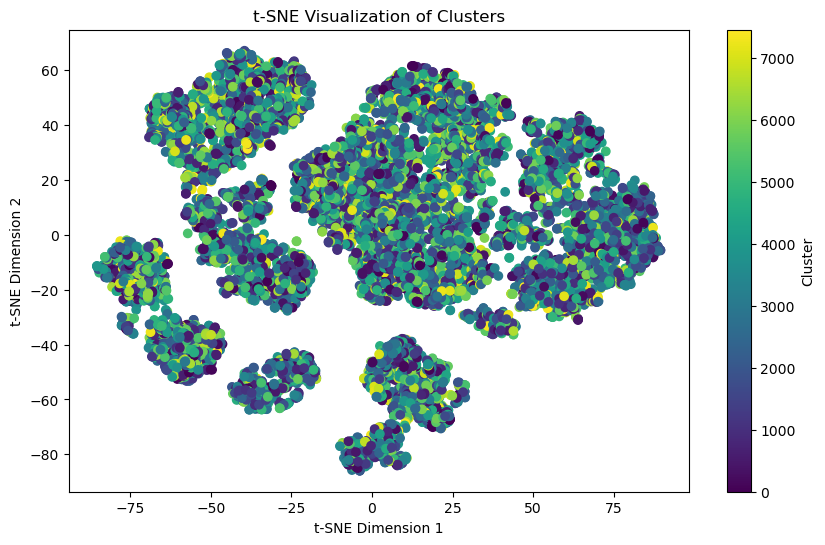

In [1412]:
# Visualize the clusters using t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters2, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [1413]:
unique_clusters = np.unique(clusters2)
cluster_features = {}

for cluster_label in unique_clusters:
    cluster_mask = (clusters2 == cluster_label)
    cluster_data = songsAnalysisData[cluster_mask]
    cluster_mean = np.mean(cluster_data, axis=0)  # Compute mean along columns (features)
    cluster_features[cluster_label] = cluster_mean

In [1414]:
cluster_features

{0: duration_ms_x       0.242231
 popularity          0.000000
 danceability        0.625506
 energy              0.817194
 key                 0.378788
 loudness            0.853854
 mode                1.000000
 speechiness         0.063466
 acousticness        0.036327
 instrumentalness    0.000112
 liveness            0.134968
 valence             0.642424
 tempo               0.465753
 time_signature      0.800000
 followers           0.018719
 False               1.000000
 True                0.000000
 dtype: float64,
 1: duration_ms_x       0.251419
 popularity          0.503623
 danceability        0.793522
 energy              0.790409
 key                 0.939394
 loudness            0.843236
 mode                0.000000
 speechiness         0.233648
 acousticness        0.275434
 instrumentalness    0.000007
 liveness            0.159159
 valence             0.555892
 tempo               0.503279
 time_signature      0.800000
 followers           0.035151
 False           

In [1415]:
spindtTracksAnalysis = spindtTracksAnalysis.join(pd.get_dummies(spindtTracksAnalysis['explicit']))
spindtTracksAnalysis.dropna(inplace=True)
spindtTracksAnalysis.reset_index(inplace=True)
spindtTracksAnalysis.drop(['explicit', 'index'], axis=1, inplace=True)

In [1417]:
songsAlbums = spindtTracksAnalysis['album']

songsAlbumsArr = []
for i in songsAlbums:
    songsAlbumsArr.append(ast.literal_eval(i)['name'])

spindtTracksAnalysis['album'] = songsAlbumsArr

spindtTracksAnalysis['single_genre'] = spindtTracksAnalysis['genres'].apply(find_most_common_genre)
spindtTracksAnalysis.drop(['genres', 'name', 'time_signature'], axis=1, inplace=True)

ValueError: malformed node or string: <ast.BinOp object at 0x00000227854669A0>

In [1418]:
# spindtTracksAnalysis['single_genre'] = le.fit_transform(spindtTracksAnalysis['single_genre'])
# spindtTracksAnalysis['album'] = le.fit_transform(spindtTracksAnalysis['album'])
# spindtTracksAnalysis['artist_name'] = le.fit_transform(spindtTracksAnalysis['artist_name'])
spindtTracksAnalysis.drop(['single_genre', 'album', 'artist_name'], axis=1, inplace=True)

In [1419]:
scalerMM = MinMaxScaler()
numerical_columns = spindtTracksAnalysis.select_dtypes(include=['float64', 'int64']).columns.tolist()
spindtTracksAnalysis[numerical_columns] = scalerMM.fit_transform(spindtTracksAnalysis[numerical_columns])

In [1420]:
spindtTracksAnalysis

,duration_ms_x,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,followers,False,True
0,0.404449,Don't Wanna Fight,0.000000,0.446556,1.000000,1.000000,1.000000,0.0,1.000000,0.367961,0.214000,0.161629,0.553947,0.289543,0.0,"['alabama indie', 'modern blues rock', 'rock']",0.981919,0,1
1,1.000000,Only For You,0.037037,0.615202,0.638587,1.000000,0.762924,1.0,0.018195,0.052968,0.139000,0.159001,0.864474,0.090902,0.0,['stomp and holler'],0.000000,1,0
2,0.000000,Back Pocket,0.827160,1.000000,0.551630,0.111111,0.596771,1.0,0.905386,0.689113,0.005620,0.000000,1.000000,0.175085,0.0,"['ann arbor indie', 'funk rock', 'instrumental...",0.492628,1,0
3,0.451876,River,0.000000,0.570071,0.000000,0.777778,0.313078,1.0,0.117904,0.998534,0.000000,0.332457,0.080263,0.588254,0.0,"['modern blues', 'neo soul', 'soul']",1.000000,1,0
4,0.488151,Two Weeks,0.024691,0.282660,0.724185,0.444444,0.790949,1.0,0.000000,0.411954,0.011360,0.095926,0.755263,0.930626,0.0,"['art pop', 'baroque pop', 'brooklyn indie', '...",0.452693,1,0
5,0.422224,Where'd All the Time Go?,1.000000,0.085511,0.870924,0.111111,0.918284,1.0,0.204512,0.181722,0.001938,0.187911,0.585526,1.000000,0.0,"['chamber pop', 'indie rock', 'modern folk roc...",0.233821,1,0
6,0.850379,Pulaski at Night,0.716049,0.066508,0.630435,0.666667,0.579811,1.0,0.200146,0.970671,0.001636,0.135611,0.527632,0.280645,0.0,"['baroque pop', 'chamber pop', 'chicago indie'...",0.275506,1,0
7,0.369033,Bring My Baby Back,0.493827,0.370546,0.843750,0.000000,0.782877,0.0,0.086608,0.040357,0.003140,1.000000,0.382895,0.000000,0.0,"['chamber pop', 'indie rock', 'modern folk roc...",0.233821,1,0
8,0.050951,Lampshades on Fire,0.728395,0.572447,0.987772,0.666667,0.944313,0.0,0.103348,0.216917,0.000007,0.161629,0.871053,0.230912,0.0,"['alternative rock', 'chamber pop', 'indie roc...",0.859612,1,0
9,0.344200,Ride On / Right On,0.000000,0.287411,0.546196,0.666667,0.625340,1.0,0.021834,0.000000,0.117800,0.279895,0.140789,0.231753,0.0,"['alternative americana', 'chamber pop', 'coun...",0.033458,1,0
